In [4]:
import numpy as np
import math
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [5]:
from pylab import rcParams

rcParams['figure.figsize'] = (15, 10)
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [6]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [140]:
class Neural_Network():
    
    def __init__(self, lear_rate, X_size, hidden_size, y_size):
        self.lear_rate = lear_rate
        self.X_size = X_size
        self.hidden_size = hidden_size
        self.y_size = y_size
        
        self.error_history = []
        self.epoch_list = []
        
        self.weights_1 = np.random.randint(low=0, high=1, size=(self.hidden_size, self.y_size))
        self.weights_2 = np.random.randint(low=0, high=1, size=(self.X_size, self.hidden_size))

        
        
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-1 * x))
    
    def softmax(self, x):
        e_x = np.exp(x)
        return e_x / e_x.sum(axis=0) 
    
    def feed_forward(self, X): 
        hidden = self.sigmoid(X.reshape(1, self.X_size) @ self.weights_2) # 1x128
        """ There are transponations below, because softmax is applied on wrong axis,
            but when I change axis in function of softmax, I have an error """ 
        y_pred = self.softmax((hidden @ self.weights_1).T) # 1x128 @ 128x10 = 1x10 -> 10x1
        y_pred = (y_pred).T # 10x1 -> 1x10
        return hidden, y_pred
        
    def loss_(self, y, y_pred):
        loss = y.reshape(1, self.y_size) * y_pred.reshape(1, self.y_size)
        loss = loss.sum()
        if loss == 0:
            loss = 1
        else:
            loss = -(np.log(loss))
        return loss
    
    def compute_grad(self, X, hidden, y_pred, y):
        diff1 = y_pred - y.reshape(1, self.y_size) # 1x10 - 1x10 = 1x10
        temp1 = diff1 @ self.weights_1.T # 1x10 @ (128x10).T = 1x128
        diff2 = hidden * (1 - hidden) # 1x128
        temp2 = temp1 * diff2
        grad_to_weights_2 = X.reshape(self.X_size, 1) @ temp2
        grad_to_weights_1 = hidden.T @ diff1
        return grad_to_weights_1, grad_to_weights_2
          
    def correct_W(self, grad_to_weights_1, grad_to_weights_2):
        self.weights_1 = self.weights_1 - self.lear_rate * grad_to_weights_1
        self.weights_2 = self.weights_2 - self.lear_rate * grad_to_weights_2
        
    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            self.epoch_loss = 0
            for j in range(1000):
                i = random.randrange(1, len(X), 1)
                X_i = X[i]
                y_i = y[i]
                hidden, y_pred = self.feed_forward(X_i)
                loss = self.loss_(y_i, y_pred)
                grad_to_weights_1, grad_to_weights_2 = self.compute_grad(X_i, hidden, y_pred, y_i)
                self.correct_W(grad_to_weights_1, grad_to_weights_2)
                
                self.epoch_loss += loss
                
            self.error_history.append(self.epoch_loss)
            self.epoch_list.append(epoch)
        
    def graph(self):
        plt.plot(self.epoch_list, self.error_history)
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show() 
        
    def predict(self, X):
        hidden = self.sigmoid(X.reshape(len(X), self.X_size) @ self.weights_2) # 1x128
        """ There are transponations below, because softmax is applied on wrong axis,
            but when I change axis in function of softmax, I have an error """ 
        y_pred = self.softmax((hidden @ self.weights_1).T) # 1x128 @ 128x10 = 1x10 -> 10x1
        y_pred = (y_pred).T # 10x1 -> 1x10
        return y_pred
        

def accuracy(y_pred, new_output):
    accuracy = y_pred * new_output
    accuracy = accuracy.sum(axis=1)
    accuracy = accuracy.sum(axis=0)
    accuracy = (accuracy / new_output.shape[0]) * 100
    print(accuracy)

In [136]:
nn = Neural_Network(lear_rate=0.01, X_size=2, hidden_size=10, y_size=2)

In [137]:
nn.train(X, y) # X and y must be here

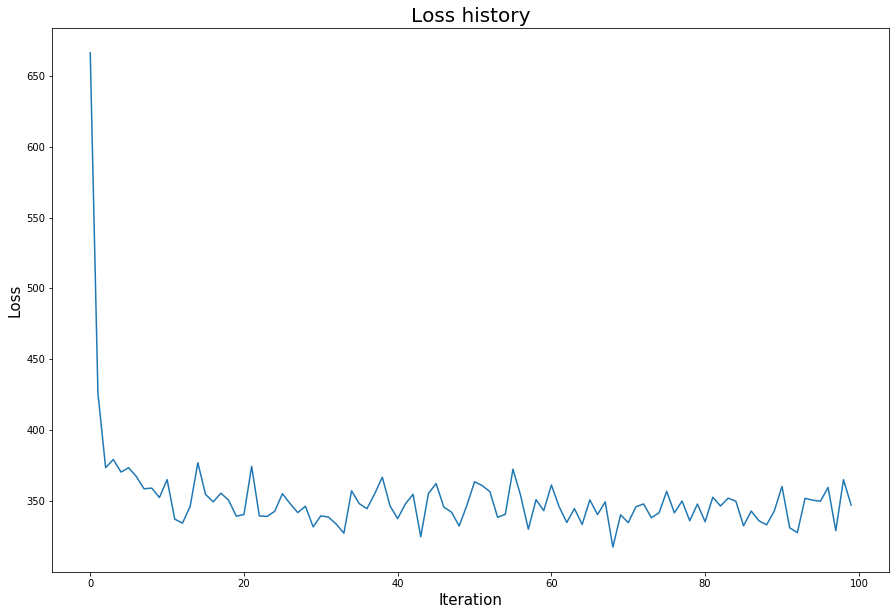

In [138]:
nn.graph()

In [139]:
y_pred = nn.predict(X)
y_pred

array([[1.45920579e-04, 1.42972270e-04],
       [1.44493132e-04, 1.44384693e-04],
       [1.44506185e-04, 1.44371651e-04],
       [1.44444257e-04, 1.44433547e-04],
       [1.44530729e-04, 1.44347133e-04],
       [1.44461677e-04, 1.44416131e-04],
       [1.44528851e-04, 1.44349009e-04],
       [1.44527348e-04, 1.44350510e-04],
       [1.44459972e-04, 1.44417836e-04],
       [1.44816840e-04, 1.44061951e-04],
       [1.44467098e-04, 1.44410712e-04],
       [1.45512105e-04, 1.43373615e-04],
       [1.44488950e-04, 1.44388872e-04],
       [1.44708994e-04, 1.44169314e-04],
       [1.44461716e-04, 1.44416092e-04],
       [1.44450890e-04, 1.44426915e-04],
       [1.44471541e-04, 1.44406271e-04],
       [1.44817307e-04, 1.44061487e-04],
       [1.44583164e-04, 1.44294784e-04],
       [1.44464071e-04, 1.44413738e-04],
       [1.44637735e-04, 1.44240343e-04],
       [1.44527628e-04, 1.44350231e-04],
       [1.44456081e-04, 1.44421725e-04],
       [1.44566122e-04, 1.44311794e-04],
       [1.446183

In [129]:
X

array([[-2.63326871, -2.64131455],
       [-3.78287376, -4.39101041],
       [-4.77680126, -3.19623592],
       [-4.81372483, -5.38852709],
       [-3.13297222, -4.58405722],
       [-5.00154701, -3.92332112],
       [-4.24578812, -3.47728814],
       [-4.15844118, -3.58043473],
       [-4.37760952, -4.62263834],
       [-3.78955161, -2.67428608],
       [-3.30487463, -5.45042896],
       [-3.87153198, -1.67302786],
       [-4.6470846 , -3.58805259],
       [-4.6717957 , -2.07822373],
       [-3.99146905, -4.94293893],
       [-4.99862173, -4.49163772],
       [-3.98156904, -4.63742345],
       [-1.96348252, -4.51921576],
       [-3.08160807, -4.2380937 ],
       [-3.34972382, -5.50512848],
       [-2.9945955 , -4.04348504],
       [-4.16360889, -3.57242519],
       [-5.67313791, -3.49281054],
       [-2.97092922, -4.46070809],
       [-3.17345191, -3.95310503],
       [-3.31114418, -3.65670617],
       [-3.27734977, -3.04329658],
       [-3.28262316, -4.66037169],
       [-5.76859287,

In [9]:
nn.accuracy(y_test_pred, y_test)

18.347458614533014


In [44]:
x1 = np.random.normal(loc=-4, scale=1.0, size=100)
y1 = np.random.normal(loc=-4, scale=1.0, size=100)

In [45]:
x2 = np.random.normal(loc=4, scale=1.0, size=100)
y2 = np.random.normal(loc=4, scale=1.0, size=100)

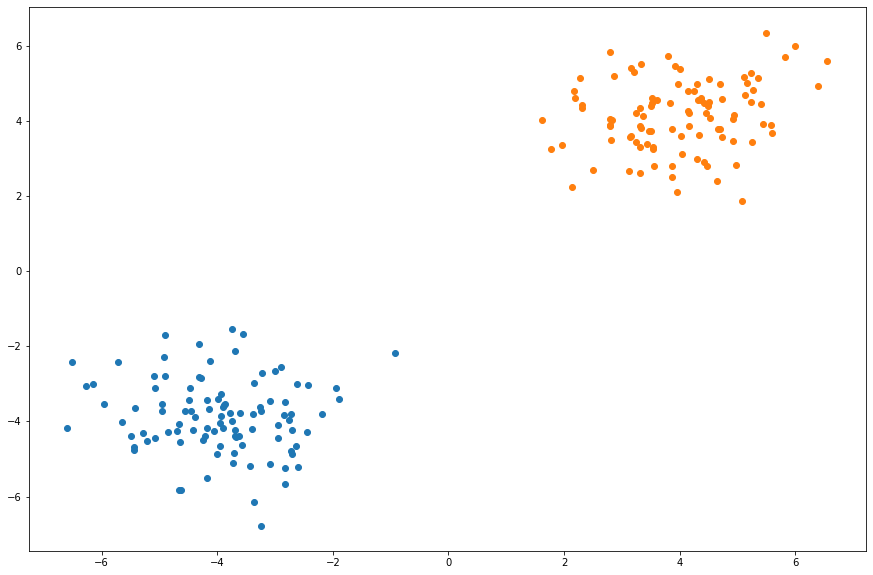

In [46]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()

In [98]:
y1 = np.ones(100)
y2 = np.zeros(100)

y = np.hstack((y1, y2))
y.shape

data = np.zeros((200, 2))

data

for i in range(100):
    x1 = np.random.normal(loc=-4, scale=1.0)
    y1 = np.random.normal(loc=-4, scale=1.0)
    data[i][0] = x1
    data[i][1] = y1

for i in range(100, 200):
    x2 = np.random.normal(loc=4, scale=1.0)
    y2 = np.random.normal(loc=4, scale=1.0)
    data[i][0] = x2
    data[i][1] = y2

X = data
y = to_categorical(y)

In [114]:
z = np.array([[1,2,3],
              [1,2,3]])

In [115]:
z1 = np.argmax(z, axis=1)

In [116]:
z1

array([2, 2])